Random Forest AUC: 0.675
Random Forest Sensitivity: 0.960
Random Forest Specificity: 0.100
Random Forest Youden J: 0.060

XGBoost AUC: 0.587
XGBoost Sensitivity: 0.867
XGBoost Specificity: 0.250
XGBoost Youden J: 0.117



c:\Users\luo20\anaconda3\envs\pubes\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\luo20\anaconda3\envs\pubes\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MLP AUC: 0.662
MLP Sensitivity: 0.893
MLP Specificity: 0.250
MLP Youden J: 0.143

[LightGBM] [Info] Number of positive: 292, number of negative: 84
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 376, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.776596 -> initscore=1.245937
[LightGBM] [Info] Start training from score 1.245937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

c:\Users\luo20\anaconda3\envs\pubes\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networks AUC: 0.698
Neural Networks Sensitivity: 0.933
Neural Networks Specificity: 0.250
Neural Networks Youden J: 0.183



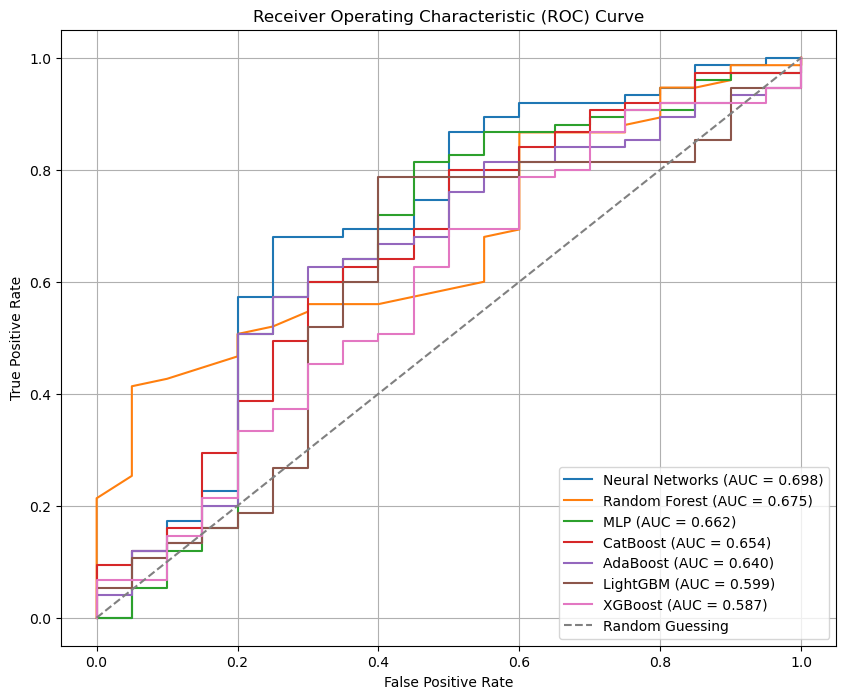

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# 读取数据
# file_path = r'D:\2024课题组项目\徐汇区护理学科人才队伍建设调查研究\8.30_论文撰写_专科护士机器学习模型\9.1_ML_专科护士.xlsx'
file_path = r'paper_data.xlsx'
data = pd.read_excel(file_path)

# 定义特征和目标变量
features = ['Institution Level', 'Age', 'Gender', 'Number of Children Under 12', 'Years of Work Experience',
'Years of Work Experience at Current Institution', 'First Degree', 'Highest Degree', 'Job Title', 'Position', 'Monthly Night Shift Frequency', 
            'Employment Type', 'Monthly Take-home Income', 'Number of Specialist Trainings/Continuing Education Attended', 
            'Whether Working in a Specialist Nursing Outpatient Clinic', 
            'Average Number of Clinical Teaching/Training Activities Participated in per Year', 
            'Degree of Application of Specialist Skills in Subsequent Clinical Practice', 
            'Whether Undertaken Research Projects in the Past Three Years', 'Whether Role Stress is High', 
            'Whether Empathy Level is High', 'Whether Level of Happiness is High', 'Whether Satisfaction with Performance Distribution is High'
           ]
target =  'In Your Current Medical Institution, Your Inclination to Change Position in the Next 1-10 Years'

X = data[features]
y = data[target]

# 对字符串类型的特征进行独热编码
categorical_features = ['Institution Level',  'Gender', 'Number of Children Under 12',  'First Degree', 'Highest Degree', 'Job Title', 'Position',
                         'Monthly Night Shift Frequency', 
            'Employment Type', 'Monthly Take-home Income', 'Number of Specialist Trainings/Continuing Education Attended', 
            'Whether Working in a Specialist Nursing Outpatient Clinic', 
            'Average Number of Clinical Teaching/Training Activities Participated in per Year', 
            'Degree of Application of Specialist Skills in Subsequent Clinical Practice', 
            'Whether Undertaken Research Projects in the Past Three Years', 'Whether Role Stress is High', 
            'Whether Empathy Level is High', 'Whether Level of Happiness is High', 'Whether Satisfaction with Performance Distribution is High']
categorical_transformer = OneHotEncoder()

# 对数值型特征进行标准化
numeric_features = ['Age','Years of Work Experience','Years of Work Experience at Current Institution']
numeric_transformer = StandardScaler()

# 定义ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 使用Pipeline进行流水线处理
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear')))])

# 对数据进行预处理和特征选择
X_selected = pipeline.fit_transform(X, y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 建立机器学习模型
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "MLP": MLPClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
    "Neural Networks": MLPClassifier()
}

# 训练和评估模型
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # 计算混淆矩阵
    y_pred_binary = (y_pred >= 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    
    # 计算敏感性（召回率）、特异性和Youden指数
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    youden_j = sensitivity + specificity - 1
    
    results[name] = {
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "youden_j": youden_j
    }
    
    print(f'{name} AUC: {auc:.3f}')
    print(f'{name} Sensitivity: {sensitivity:.3f}')
    print(f'{name} Specificity: {specificity:.3f}')
    print(f'{name} Youden J: {youden_j:.3f}\n')

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
# 根据AUC值降序排列
sorted_results = sorted(results.items(), key=lambda x: x[1]["auc"], reverse=True)

for name, result in sorted_results:
    plt.plot(result["fpr"], result["tpr"], label=f'{name} (AUC = {result["auc"]:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
# plt.savefig(r'D:\2024课题组项目\徐汇区护理学科人才队伍建设调查研究\8.30_论文撰写_专科护士机器学习模型\non_Lesso_mutiple_model_转岗预测_9.6.png', dpi=600)
plt.savefig('image.png', dpi=600)
plt.show()

Random Forest AUC: 0.963
Random Forest Sensitivity: 0.929
Random Forest Specificity: 0.857
Random Forest Youden's J: 0.786
XGBoost AUC: 0.931
XGBoost Sensitivity: 0.893
XGBoost Specificity: 0.825
XGBoost Youden's J: 0.718


C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP AUC: 0.926
MLP Sensitivity: 0.762
MLP Specificity: 0.984
MLP Youden's J: 0.746
[LightGBM] [Info] Number of positive: 283, number of negative: 304
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 587, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482112 -> initscore=-0.071581
[LightGBM] [Info] Start training from score -0.071581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networks AUC: 0.932
Neural Networks Sensitivity: 0.774
Neural Networks Specificity: 0.968
Neural Networks Youden's J: 0.742


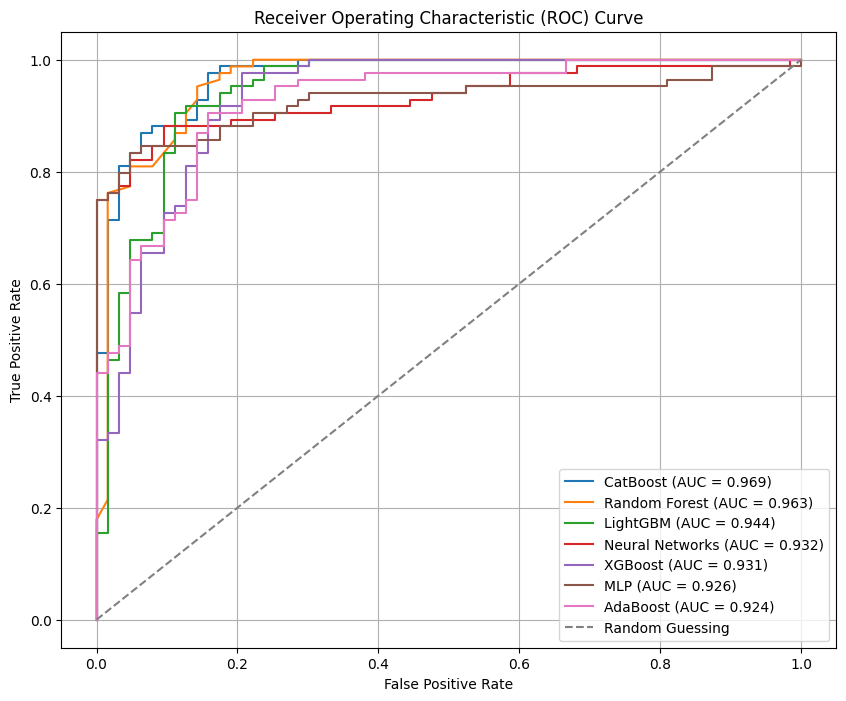

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# 读取数据
file_path = r'D:\2024课题组项目\徐汇区护理学科人才队伍建设调查研究\8.30_论文撰写_专科护士机器学习模型\9.1_ML_专科护士.xlsx'
data = pd.read_excel(file_path)

# 定义特征和目标变量
features = ['Institution Level', 'Age', 'Gender', 'Number of Children Under 12', 'Years of Work Experience',
            'Years of Work Experience at Current Institution', 'First Degree', 'Highest Degree', 'Job Title', 'Position', 
            'Monthly Night Shift Frequency', 'Employment Type', 'Monthly Take-home Income', 
            'Number of Specialist Trainings/Continuing Education Attended', 
            'Whether Working in a Specialist Nursing Outpatient Clinic', 
            'Average Number of Clinical Teaching/Training Activities Participated in per Year', 
            'Degree of Application of Specialist Skills in Subsequent Clinical Practice', 
            'Whether Undertaken Research Projects in the Past Three Years', 'Whether Role Stress is High', 
            'Whether Empathy Level is High', 'Whether Level of Happiness is High', 
            'Whether Satisfaction with Performance Distribution is High']
target = 'In Your Current Medical Institution, Your Inclination to Change Position in the Next 1-10 Years'

X = data[features]
y = data[target]

# 对字符串类型的特征进行独热编码
categorical_features = ['Institution Level', 'Gender', 'Number of Children Under 12', 'First Degree', 'Highest Degree', 
                        'Job Title', 'Position', 'Monthly Night Shift Frequency', 'Employment Type', 'Monthly Take-home Income', 
                        'Number of Specialist Trainings/Continuing Education Attended', 
                        'Whether Working in a Specialist Nursing Outpatient Clinic', 
                        'Average Number of Clinical Teaching/Training Activities Participated in per Year', 
                        'Degree of Application of Specialist Skills in Subsequent Clinical Practice', 
                        'Whether Undertaken Research Projects in the Past Three Years', 'Whether Role Stress is High', 
                        'Whether Empathy Level is High', 'Whether Level of Happiness is High', 
                        'Whether Satisfaction with Performance Distribution is High']
categorical_transformer = OneHotEncoder()

# 对数值型特征进行标准化
numeric_features = ['Age', 'Years of Work Experience', 'Years of Work Experience at Current Institution']
numeric_transformer = StandardScaler()

# 定义ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 对数据进行预处理
X_preprocessed = preprocessor.fit_transform(X)

# 使用SMOTE进行过采样
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# 使用Lasso算子进行特征选择
selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'))
X_selected = selector.fit_transform(X_resampled, y_resampled)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# 建立机器学习模型
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "MLP": MLPClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
    "Neural Networks": MLPClassifier()
}

# 训练和评估模型
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    
    # 计算 ROC 曲线和 AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # 计算混淆矩阵
    y_pred = (y_pred_prob >= 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    
    # 计算敏感性、特异性和 Youden's J 统计量
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # 敏感性
    specificity = tn / (tn + fp)  # 特异性
    youden_j = sensitivity + specificity - 1  # Youden's J 统计量
    
    results[name] = {"fpr": fpr, "tpr": tpr, "auc": auc, "sensitivity": sensitivity, "specificity": specificity, "youden_j": youden_j}
    
    print(f'{name} AUC: {auc:.3f}')
    print(f'{name} Sensitivity: {sensitivity:.3f}')
    print(f'{name} Specificity: {specificity:.3f}')
    print(f'{name} Youden\'s J: {youden_j:.3f}')

# 按AUC排序模型
sorted_results = sorted(results.items(), key=lambda x: x[1]["auc"], reverse=True)

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for name, result in sorted_results:
    plt.plot(result["fpr"], result["tpr"], label=f'{name} (AUC = {result["auc"]:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig(r'D:\2024课题组项目\徐汇区护理学科人才队伍建设调查研究\8.30_论文撰写_专科护士机器学习模型\Lesso_mutiple_model_转岗预测_9.6.png', dpi=600)
plt.show()